# Seasonality plot: 

We generate ***Figure S14***

Plots the annual cycles for BC emission inventories, ATP and the absorption coefficient

In [1]:
import sys

sys.path.append(r'C:\Users\DominicHeslinRees\Documents\ACP_2023\scripts\Trends')
import trends_functions as fu_trends
sys.path.append(r'C:\Users\DominicHeslinRees\Documents\ACP_2023\scripts\functions_backtrajectories')
import functions_backtrajectories as fu_backtraj

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
path = r'C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis'
savepath_plot = r'C:\Users\DominicHeslinRees\Documents\ACP_2023\plots'

In [3]:
df_abs = fu_trends.load_df(loadpath=r'C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\absorption\appended',                   
                       filename='oldpsap_newpsap_maap',)
df_ECLIPSE = fu_trends.load_df(loadpath=r'C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\ECLIPSE',
              filename='ECLIPSE')
df_era5_GDAS = fu_trends.load_df(loadpath=r'C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\ERA5_rainfall',                   
                       filename='era5_GDAS_2002_2023')
df_era5_GDAS = fu_trends.prepare_data(df_era5_GDAS)

loading: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\absorption\appended\oldpsap_newpsap_maap.dat
loading: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\ECLIPSE\ECLIPSE.dat
loading: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\ERA5_rainfall\era5_GDAS_2002_2023.dat
start date inserted: 2002-03-08
start year: 2002
end year: 2023
number years: 21
first season: AHZ
Note: the slow build-up season crosses over two years as it goes from October-January, so the year corresponds to previous year
Number of unique seasons: 62
full_season_to_season_num given


In [4]:
df = pd.merge(df_abs, df_era5_GDAS[['tp_era5']], left_index=True, right_index=True)
df = pd.merge(df, df_ECLIPSE[['BC_emis_all']], left_index=True, right_index=True)
df_abs_rain = fu_trends.prepare_data(df)
df_abs_rain = df_abs_rain.rename(columns={'tp_era5':'accumulated'})

df_binned = fu_trends.bin_data(df_abs_rain, number_of_bins=np.arange(0, 50, 2)) #bin the data from 0 to 50 every 2nm

start date inserted: 2002-03-08
start year: 2002
end year: 2022
number years: 20
first season: AHZ
Note: the slow build-up season crosses over two years as it goes from October-January, so the year corresponds to previous year
Number of unique seasons: 59
full_season_to_season_num given


           mean  median  min     max       std  count    q25    q75
month                                                              
1      0.290629   0.147  0.0   5.893  0.486073   8109  0.064  0.348
2      0.400234   0.193  0.0   8.242  0.594018  11181  0.076  0.485
3      0.536330   0.266  0.0   9.163  0.819058  11946  0.102  0.588
4      0.409346   0.225  0.0   7.797  0.687255  11316  0.126  0.410
5      0.223823   0.129  0.0   3.841  0.324314  10456  0.064  0.238
6      0.101259   0.050  0.0   5.901  0.196200   9410  0.022  0.107
7      0.110561   0.045  0.0   5.015  0.247867   9760  0.018  0.107
8      0.066618   0.032  0.0   1.826  0.107162   9693  0.013  0.080
9      0.059919   0.026  0.0   2.274  0.137551   9220  0.012  0.060
10     0.112854   0.038  0.0  13.133  0.340620   9675  0.017  0.089
11     0.142473   0.074  0.0  11.063  0.282044  10260  0.033  0.147
12     0.275343   0.113  0.0  10.962  0.603153   9287  0.046  0.247


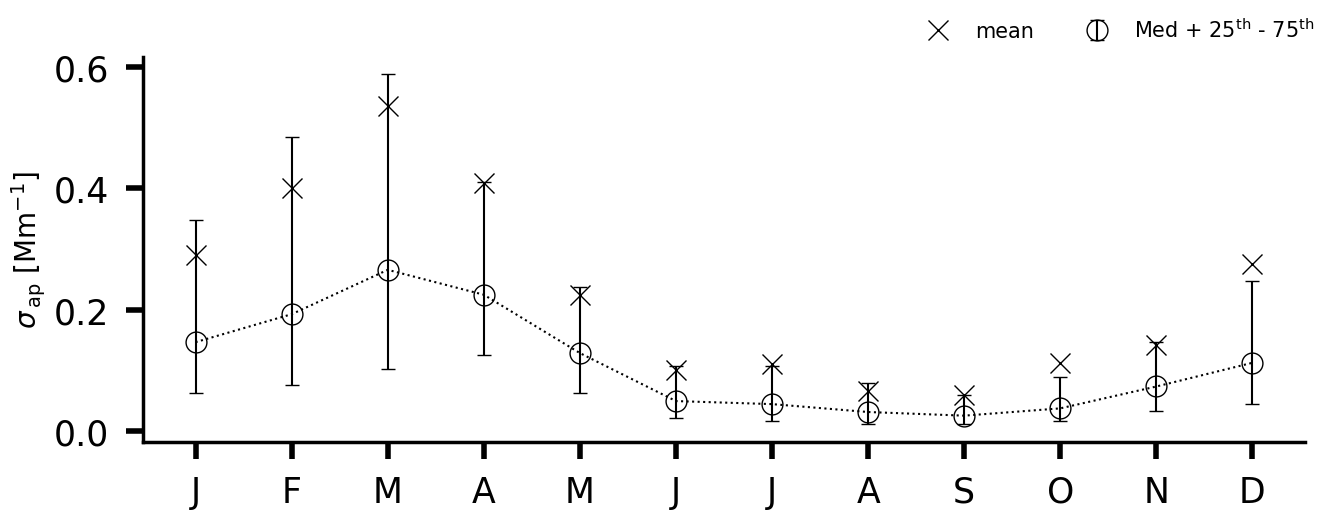

            mean     median       min        max       std  count       q25  \
month                                                                         
1       8.798422   7.648148  1.005787  35.481481  4.915291   8109  5.217593   
2       9.256939   7.171296  0.729167  43.148148  6.823804  11181  4.599537   
3       6.768093   5.245370  0.423611  35.722222  5.054325  11946  3.398148   
4       7.052315   5.532407  0.265914  47.629630  5.862966  11316  3.777199   
5       7.039936   5.833333  0.598380  46.222222  4.746905  10456  4.175347   
6       8.017613   6.592593  1.344907  46.592593  5.999982   9410  4.782407   
7      11.231793   9.138889  1.533565  48.000000  8.303341   9760  6.078704   
8      10.818749  10.083333  1.228009  48.000000  5.204513   9693  7.046296   
9      12.177527  10.851852  1.069444  47.962963  6.041371   9220  8.092593   
10     10.207582   8.921296  1.452546  48.000000  5.365490   9675  6.921296   
11     10.297902   8.453704  1.505787  48.000000  6.

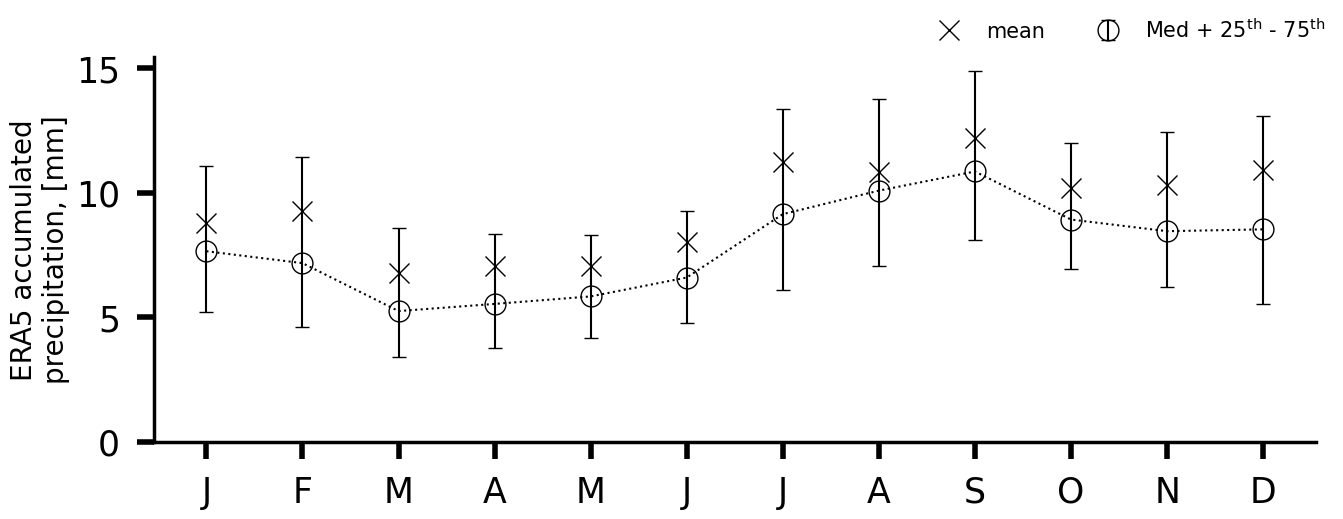

In [5]:
fig = fu_trends.make_annual_plot(df_binned, var='abs637', ms=15, display_label=True, x_marker='x')

fig = fu_trends.make_annual_plot(df_binned, var='accumulated', ms=15, ymin=0,
                                 ylabel='ERA5 accumulated\nprecipitation, [mm]', display_label=True,
                                x_marker='x')

In [6]:
def plot_monthly_dfs(df, error_var='quantiles', color='k', title='', ylabel='$\sigma_{\mathrm{ap, 637 nm}}$',
                     mfc='green', mec='k', ecolor='black', linecolour='k', ms=1, label='', display_label=False,
                     xcoord_bbox=0.65, ycoord_bbox=1.15, fs_ticks=20, rotation=None, month_xticks=False, week_ordinal_xticks=False,
                     month_ordinal_xticks=False, season_ordinal_xticks=False, startyear=2006,endyear=2020, tick_frequency=6, fs_label=15, 
                     first_season_abb='SBU', fmt="o", ymin=None, ymax=None, plot_medians=True, x_marker='x-', 
                     plot_means=True, ax=None):  
                     
    index = df.index
    mean =  df['mean'].values
    median =  df['median'].values
    std = df['std'].values
    
    if error_var=='std':
        if display_label==True:
            error_label='std'
        if display_label==False:  
            error_label='_' 
        ax.errorbar(index, mean, yerr=std, fmt='x', capsize=5, color=color, mfc=mfc, ecolor=ecolor, ms=ms, label=error_label, mec=mec)
        ax.plot(index, mean, label=label, color=color, ls=':')
    
    if error_var=='quantiles':
        quan_25 = df['q25'].values
        quan_75 = df['q75'].values
        if display_label==True:
            error_label='Med + 25$^{\mathrm{th}}$ - 75$^{\mathrm{th}}$'
        if display_label==False:  
            error_label='_'    
        if plot_medians == True:
            ax.errorbar(index, median, yerr=[median-quan_25, quan_75-median], fmt=fmt, capsize=5, color=color, 
                        mfc=mfc, ecolor=ecolor, ms=ms, label=error_label)
            ax.plot(index, median, label='', color=color, ls='-', lw=2.5)
        if plot_means == True:
            ax.plot(index, mean, x_marker, label='mean', color=color, ls='-', lw=2.5,
                    ms=ms)         
    
    if rotation:
        ax.xaxis.set_tick_params(rotation=45) 
    ax.set_title(title, loc='left', fontsize=15)    
    ax.spines['top'].set_visible(False) 

    if month_xticks == True:
        ax.set_xticks(np.arange(1,13,1))
        ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                           fontsize=fs_ticks)
        ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'], fontsize=fs_ticks)        
    if week_ordinal_xticks == True:
        ax.set_xticks(np.arange(1,(endyear-startyear+1)*52,52))
        ax.set_xticklabels(np.arange(startyear,endyear+1,1))  
    if month_ordinal_xticks == True:
        ax.set_xticks(np.arange(1,(endyear-startyear+1)*12,12))
        ax.set_xticklabels(np.arange(startyear,endyear+1,1))          
    if season_ordinal_xticks == True:
        ax.set_xticks(np.arange(1,(endyear-startyear+1)*3,3))
        ax.set_xticklabels(np.arange(startyear,endyear+1,1))         
    return ax

In [7]:
CB_color_cycle = ['#000000','#E69F00','#56B4E9','#009E73','#F0E442','#0072B2','#D55E00','#CC79A7']
dict_var_to_color = {'abs637':CB_color_cycle[0], 'accumulated':CB_color_cycle[5], 'BC_emis_all':CB_color_cycle[1]}

In [8]:
def make_annual_plot(df,  var='abs637', var2='accumulated', var3='BC_emis_all', ms=3, 
                     ylabel=r'$\sigma_{\: \mathrm{ap}}$ [Mm$^{-1}$]', 
                     ylabel2='ATP [mm]', display_label=False, error_var='quantiles',
                     black_tubing_date=None, ymin=None, ymax=None, plot_medians=True, x_marker='-x', fs_ticks=25,
                     title=None, dict_var_to_color = {'abs637':CB_color_cycle[0], 'accumulated':CB_color_cycle[5], 'BC_emis_all':CB_color_cycle[1]},
                     ax=None):
    single_plot = False
    if ax is None:
        single_plot = True
        fig, ax = plt.subplots(figsize=(15, 5))
        
    df_M = fu_trends.produce_averages_groupby(df, groupby_var='month', variable=var)  
    
    plot_monthly_dfs(df_M, color=dict_var_to_color[var], ylabel=ylabel, ecolor=dict_var_to_color[var], mec=dict_var_to_color[var], mfc='None',
                     ms=ms, month_xticks=True, display_label=display_label, error_var=error_var, 
                     ymin=ymin, ymax=ymax, plot_medians=plot_medians, plot_means=False, x_marker=x_marker, fs_ticks=fs_ticks,
                     title=title, ax=ax)
    ax.tick_params(labelsize=fs_ticks, direction='out', length=8, width=1.3, pad=10, bottom=True, top=False, left=True, right=False, color=dict_var_to_color[var])
    ax.tick_params(which='minor', length=4, color=dict_var_to_color[var], width=1.3)
    ax.set_ylabel(ylabel, fontsize=20)    
    ax.set_ylim(ymin, ymax)
    
    ax2 = ax.twinx()
    df_M = fu_trends.produce_averages_groupby(df, groupby_var='month', variable=var2)      
    plot_monthly_dfs(df_M, color=dict_var_to_color[var2], ylabel=ylabel, ecolor=dict_var_to_color[var2], 
                     mec=dict_var_to_color[var2], mfc='None',
                     ms=ms, month_xticks=True, display_label=display_label, error_var=error_var, 
                     ymin=ymin, ymax=ymax, plot_medians=True, plot_means=False, x_marker=x_marker, fs_ticks=fs_ticks,
                     title=title, ax=ax2)   
    ax2.tick_params(labelsize=fs_ticks, direction='out', length=8, width=1.3, pad=10, 
                    bottom=True, top=False, left=False, right=True, color=dict_var_to_color[var2])
    ax2.tick_params(which='minor', length=4, color=dict_var_to_color[var2], width=1.3)
    ax2.yaxis.label.set_color(dict_var_to_color[var2])
    ax2.set_ylabel(ylabel2, fontsize=20)    
    ax2.set_ylim(ymin, ymax)
    
    df_M = fu_trends.produce_averages_groupby(df, groupby_var='month', variable=var3)
    
    twin_extra = ax.twinx()
    twin_extra.spines.right.set_position(("axes", 1.15))
    
    plot_monthly_dfs(df_M, color=dict_var_to_color[var3], ylabel=ylabel, ecolor=dict_var_to_color[var3], 
                     mec=dict_var_to_color[var3], mfc='None',
                     ms=ms, month_xticks=True, display_label=display_label, error_var=error_var, 
                     ymin=ymin, ymax=ymax, plot_medians=False, x_marker=x_marker, fs_ticks=fs_ticks,
                     title=title, ax=twin_extra)    
    twin_extra.set_ylabel('Accumulated BC Emissons [-]',  fontsize=fs_ticks)
    twin_extra.set_ylim(0, None)
    twin_extra.tick_params(labelsize=fs_ticks, direction='out', length=8, width=1.3, pad=10, 
                    bottom=True, top=False, left=False, right=True, color=dict_var_to_color[var3])
    twin_extra.yaxis.label.set_color(dict_var_to_color[var3])
    
    if single_plot == True:
        plt.show()
        return fig
    if single_plot == False:
        return ax  

# S14: 

<ipython-input-6-862ee098ab46>:33: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-x" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(index, mean, x_marker, label='mean', color=color, ls='-', lw=2.5,


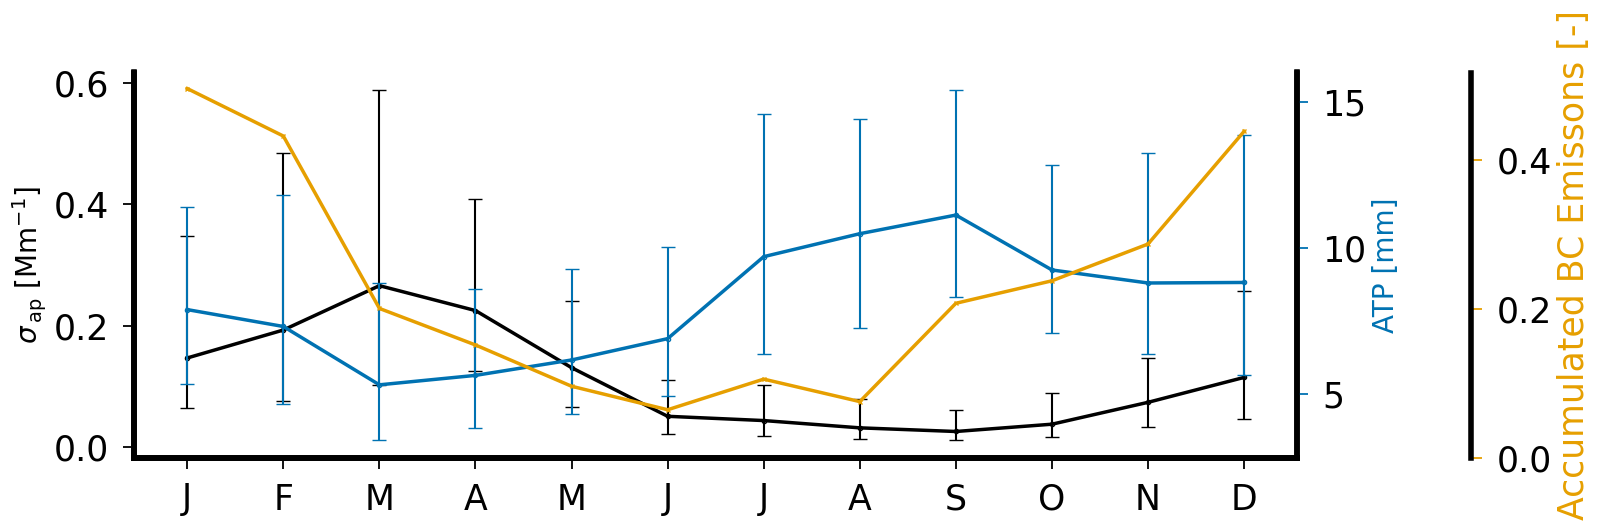

saved as: C:\Users\DominicHeslinRees\Documents\ACP_2023\plots\\FigureS14.jpeg


In [9]:
fig = make_annual_plot(df_abs_rain)
fu_trends.save_plot(fig, savepath_plot, name='FigureS14')